In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os


In [ ]:
len(gpus)

1

-----

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/yousefmohamed20/sentiment-images-classifier')

Skipping, found downloaded files in "./sentiment-images-classifier" (use force=True to force download)


In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/sentiment-images-classifier/data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
os.listdir(data_dir)

['happy', 'pain', 'anger', 'fear', 'disgust', 'sad']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/sentiment-images-classifier/data')

Found 1108 files belonging to 6 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
class_names = data.class_names

In [ ]:
class_names

['anger', 'disgust', 'fear', 'happy', 'pain', 'sad']

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

In [ ]:
len(batch)

2

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x, y: (x / 255.0, tf.one_hot(y, depth=len(class_names))))

In [ ]:
len(data)

35

In [ ]:
data.as_numpy_iterator().next()


(array([[[[0.43053243, 0.41092458, 0.38739517],
          [0.4395527 , 0.41994485, 0.39641544],
          [0.44126838, 0.42166054, 0.39813113],
          ...,
          [0.45284927, 0.41755515, 0.39010417],
          [0.44381127, 0.40851715, 0.38106617],
          [0.4419424 , 0.40664828, 0.3791973 ]],
 
         [[0.43380103, 0.41419318, 0.39066377],
          [0.44274518, 0.42313734, 0.39960793],
          [0.44293284, 0.423325  , 0.3997956 ],
          ...,
          [0.45284927, 0.41755515, 0.39010417],
          [0.44381127, 0.40851715, 0.38106617],
          [0.4419424 , 0.40664828, 0.3791973 ]],
 
         [[0.43599877, 0.41639093, 0.39286152],
          [0.44521055, 0.4256027 , 0.4020733 ],
          [0.4460952 , 0.42648736, 0.40295795],
          ...,
          [0.45284927, 0.41755515, 0.39010417],
          [0.44381127, 0.40851715, 0.38106617],
          [0.4419424 , 0.40664828, 0.3791973 ]],
 
         ...,
 
         [[0.23719363, 0.21758579, 0.20189951],
          [0.24111

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

24

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

3

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
from keras.losses import CategoricalCrossentropy

In [ ]:
model.compile('adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [ ]:
logdir='/content/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 17s 608ms/step - loss: 1.8398 - accuracy: 0.1992 - val_loss: 1.7501 - val_accuracy: 0.1964
Epoch 2/20
24/24 [==============================] - 13s 491ms/step - loss: 1.6952 - accuracy: 0.3047 - val_loss: 1.6542 - val_accuracy: 0.3482
Epoch 3/20
24/24 [==============================] - 12s 485ms/step - loss: 1.4761 - accuracy: 0.4323 - val_loss: 1.5543 - val_accuracy: 0.4375
Epoch 4/20
24/24 [==============================] - 12s 478ms/step - loss: 1.1856 - accuracy: 0.5703 - val_loss: 1.4438 - val_accuracy: 0.4598
Epoch 5/20
24/24 [==============================] - 12s 476ms/step - loss: 0.8136 - accuracy: 0.7161 - val_loss: 1.3329 - val_accuracy: 0.5714
Epoch 6/20
24/24 [==============================] - 12s 474ms/step - loss: 0.5864 - accuracy: 0.8112 - val_loss: 1.4047 - val_accuracy: 0.5982
Epoch 7/20
24/24 [==============================] - 16s 639ms/step - loss: 0.4142 - accuracy: 0.8841 - val_loss: 1.4410 - val_accuracy: 0.6027

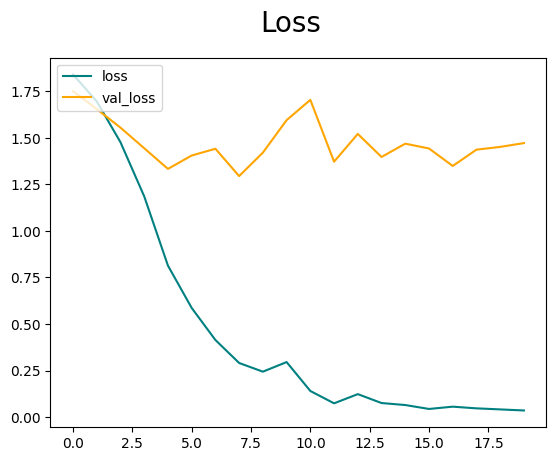

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

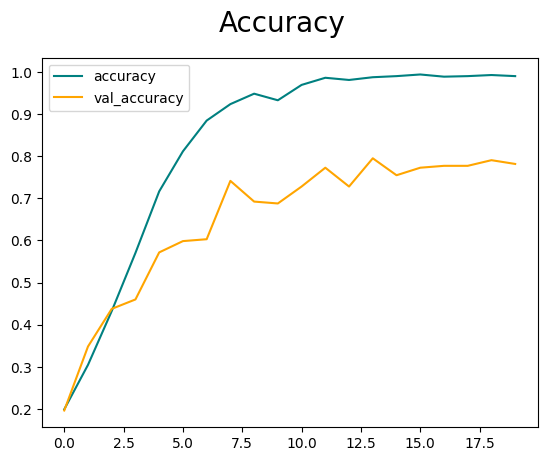

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 30ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7553192, shape=(), dtype=float32) tf.Tensor(0.7395833, shape=(), dtype=float32) tf.Tensor(0.9166667, shape=(), dtype=float32)


In [ ]:
import cv2

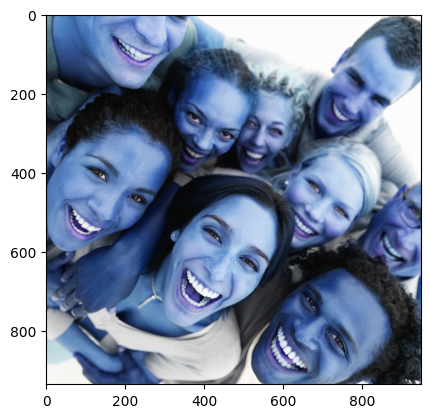

In [ ]:
img = cv2.imread('/content/happy.jpg')
plt.imshow(img)
plt.show()

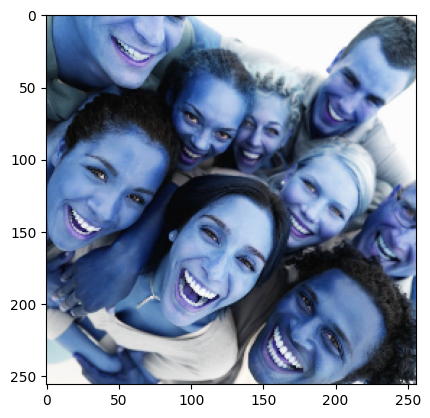

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 62ms/step


In [ ]:
yhat

array([[1.8355013e-04, 1.0614959e-07, 9.1087676e-12, 9.9705541e-01,
        1.9755566e-05, 2.7411936e-03]], dtype=float32)

In [ ]:
predicted_labels = np.argmax(yhat, axis=1)

In [ ]:
for i, prediction in enumerate(yhat):
    class_index = np.argmax(prediction)
    class_name = class_names[class_index]
    probability = prediction[class_index]
    print(f"Prediction for sample {i+1}: Class {class_name} with probability {probability:.2f}")

Prediction for sample 1: Class happy with probability 1.00
